## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
#!pip install geopandas

In [2]:
#import geopandas as gpd
import folium 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
import statsmodels.api as sm
from statsmodels.formula.api import ols


In [3]:
df = pd.read_csv('data/kc_house_data.csv', index_col='id')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     19221 non-null  object 
 8   view           21534 non-null  object 
 9   condition      21597 non-null  object 
 10  grade          21597 non-null  object 
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  object 
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   17755 non-null  float64
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float

In [5]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,Average,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [6]:
for c in df.columns:
    print ("---- %s ---" % c)
    print (df[c].value_counts())
    print("\n")

---- date ---
6/23/2014    142
6/25/2014    131
6/26/2014    131
7/8/2014     127
4/27/2015    126
            ... 
3/8/2015       1
8/30/2014      1
5/27/2015      1
2/15/2015      1
5/15/2015      1
Name: date, Length: 372, dtype: int64


---- price ---
350000.0    172
450000.0    172
550000.0    159
500000.0    152
425000.0    150
           ... 
870515.0      1
336950.0      1
386100.0      1
176250.0      1
884744.0      1
Name: price, Length: 3622, dtype: int64


---- bedrooms ---
3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64


---- bathrooms ---
2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
5.75       4
0.50       4
8.00       2
6.25       2
6

In [7]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [8]:
#Finding which row contains the 33 bedroom home
#Given the square footage it is safe to assume that this is a typo
df.loc[df['bedrooms'] == 33]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
2402100895,6/25/2014,640000.0,33,1.75,1620,6000,1.0,NO,NONE,Very Good,7 Average,1040,580.0,1947,0.0,98103,47.6878,-122.331,1330,4700


In [9]:
#Fixing the typo and checking to make sure the 33 is now gone
df['bedrooms'].replace(33, 3, inplace=True)
df['bedrooms'].value_counts()

3     9825
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
Name: bedrooms, dtype: int64

In [21]:
import geopy
from geopy import distance

In [16]:
downtown = (47.605, -122.3344)

In [17]:
location = list(zip(df.lat, df.long))

In [22]:
def distancer(row):
    coords_1 = downtown
    coords_2 = (row['lat'], row['long'])
    return geopy.distance.distance(coords_1, coords_2).miles

df['distance_from_dt'] = df.apply(distancer, axis=1)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,distance_from_dt
id,,,,,,,,,,,,,,,,,,,,,
7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,Average,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,7.422544
6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,8.046186
5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,...,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,10.329114
2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,6.430056
1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,13.544634


In [23]:
df['distance_from_dt'].describe()

count    21597.000000
mean        11.512473
std          6.609412
min          0.719565
25%          6.114130
50%         10.350290
75%         15.774479
max         48.161387
Name: distance_from_dt, dtype: float64

In [24]:
#Check for multicollinearity
corr = df.corr()
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
corr[mask] = np.nan
(corr
 .style
 .background_gradient(cmap='RdBu', axis=None, vmin=-1, vmax=1)
 .highlight_null(null_color='#f1f1f1')  # Color NaNs grey
 .set_precision(2))

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,distance_from_dt
price,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
bedrooms,0.32,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
bathrooms,0.53,0.53,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
sqft_living,0.70,0.59,0.76,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
sqft_lot,0.09,0.03,0.09,0.17,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
floors,0.26,0.18,0.50,0.35,-0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
sqft_above,0.61,0.49,0.69,0.88,0.18,0.52,nan,nan,nan,nan,nan,nan,nan,nan,nan
yr_built,0.05,0.16,0.51,0.32,0.05,0.49,0.42,nan,nan,nan,nan,nan,nan,nan,nan
yr_renovated,0.13,0.02,0.05,0.06,0.00,0.00,0.02,-0.23,nan,nan,nan,nan,nan,nan,nan
zipcode,-0.05,-0.16,-0.20,-0.20,-0.13,-0.06,-0.26,-0.35,0.07,nan,nan,nan,nan,nan,nan


In [68]:
#drop multicollinear columns where correlation coefficient is greater than .7
skinnydf = df.drop(columns=['bathrooms', 'sqft_above','sqft_living15','sqft_lot15'])

In [26]:
skinnycorr = skinnydf.corr()
mask = np.zeros_like(skinnycorr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
skinnycorr[mask] = np.nan
(skinnycorr
 .style
 .background_gradient(cmap='RdBu', axis=None, vmin=-1, vmax=1)
 .highlight_null(null_color='#f1f1f1')  # Color NaNs grey
 .set_precision(2))

,price,bedrooms,sqft_living,sqft_lot,floors,yr_built,yr_renovated,zipcode,lat,long,distance_from_dt
price,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
bedrooms,0.32,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
sqft_living,0.70,0.59,nan,nan,nan,nan,nan,nan,nan,nan,nan
sqft_lot,0.09,0.03,0.17,nan,nan,nan,nan,nan,nan,nan,nan
floors,0.26,0.18,0.35,-0.00,nan,nan,nan,nan,nan,nan,nan
yr_built,0.05,0.16,0.32,0.05,0.49,nan,nan,nan,nan,nan,nan
yr_renovated,0.13,0.02,0.06,0.00,0.00,-0.23,nan,nan,nan,nan,nan
zipcode,-0.05,-0.16,-0.20,-0.13,-0.06,-0.35,0.07,nan,nan,nan,nan
lat,0.31,-0.01,0.05,-0.09,0.05,-0.15,0.03,0.27,nan,nan,nan
long,0.02,0.14,0.24,0.23,0.13,0.41,-0.07,-0.56,-0.14,nan,nan


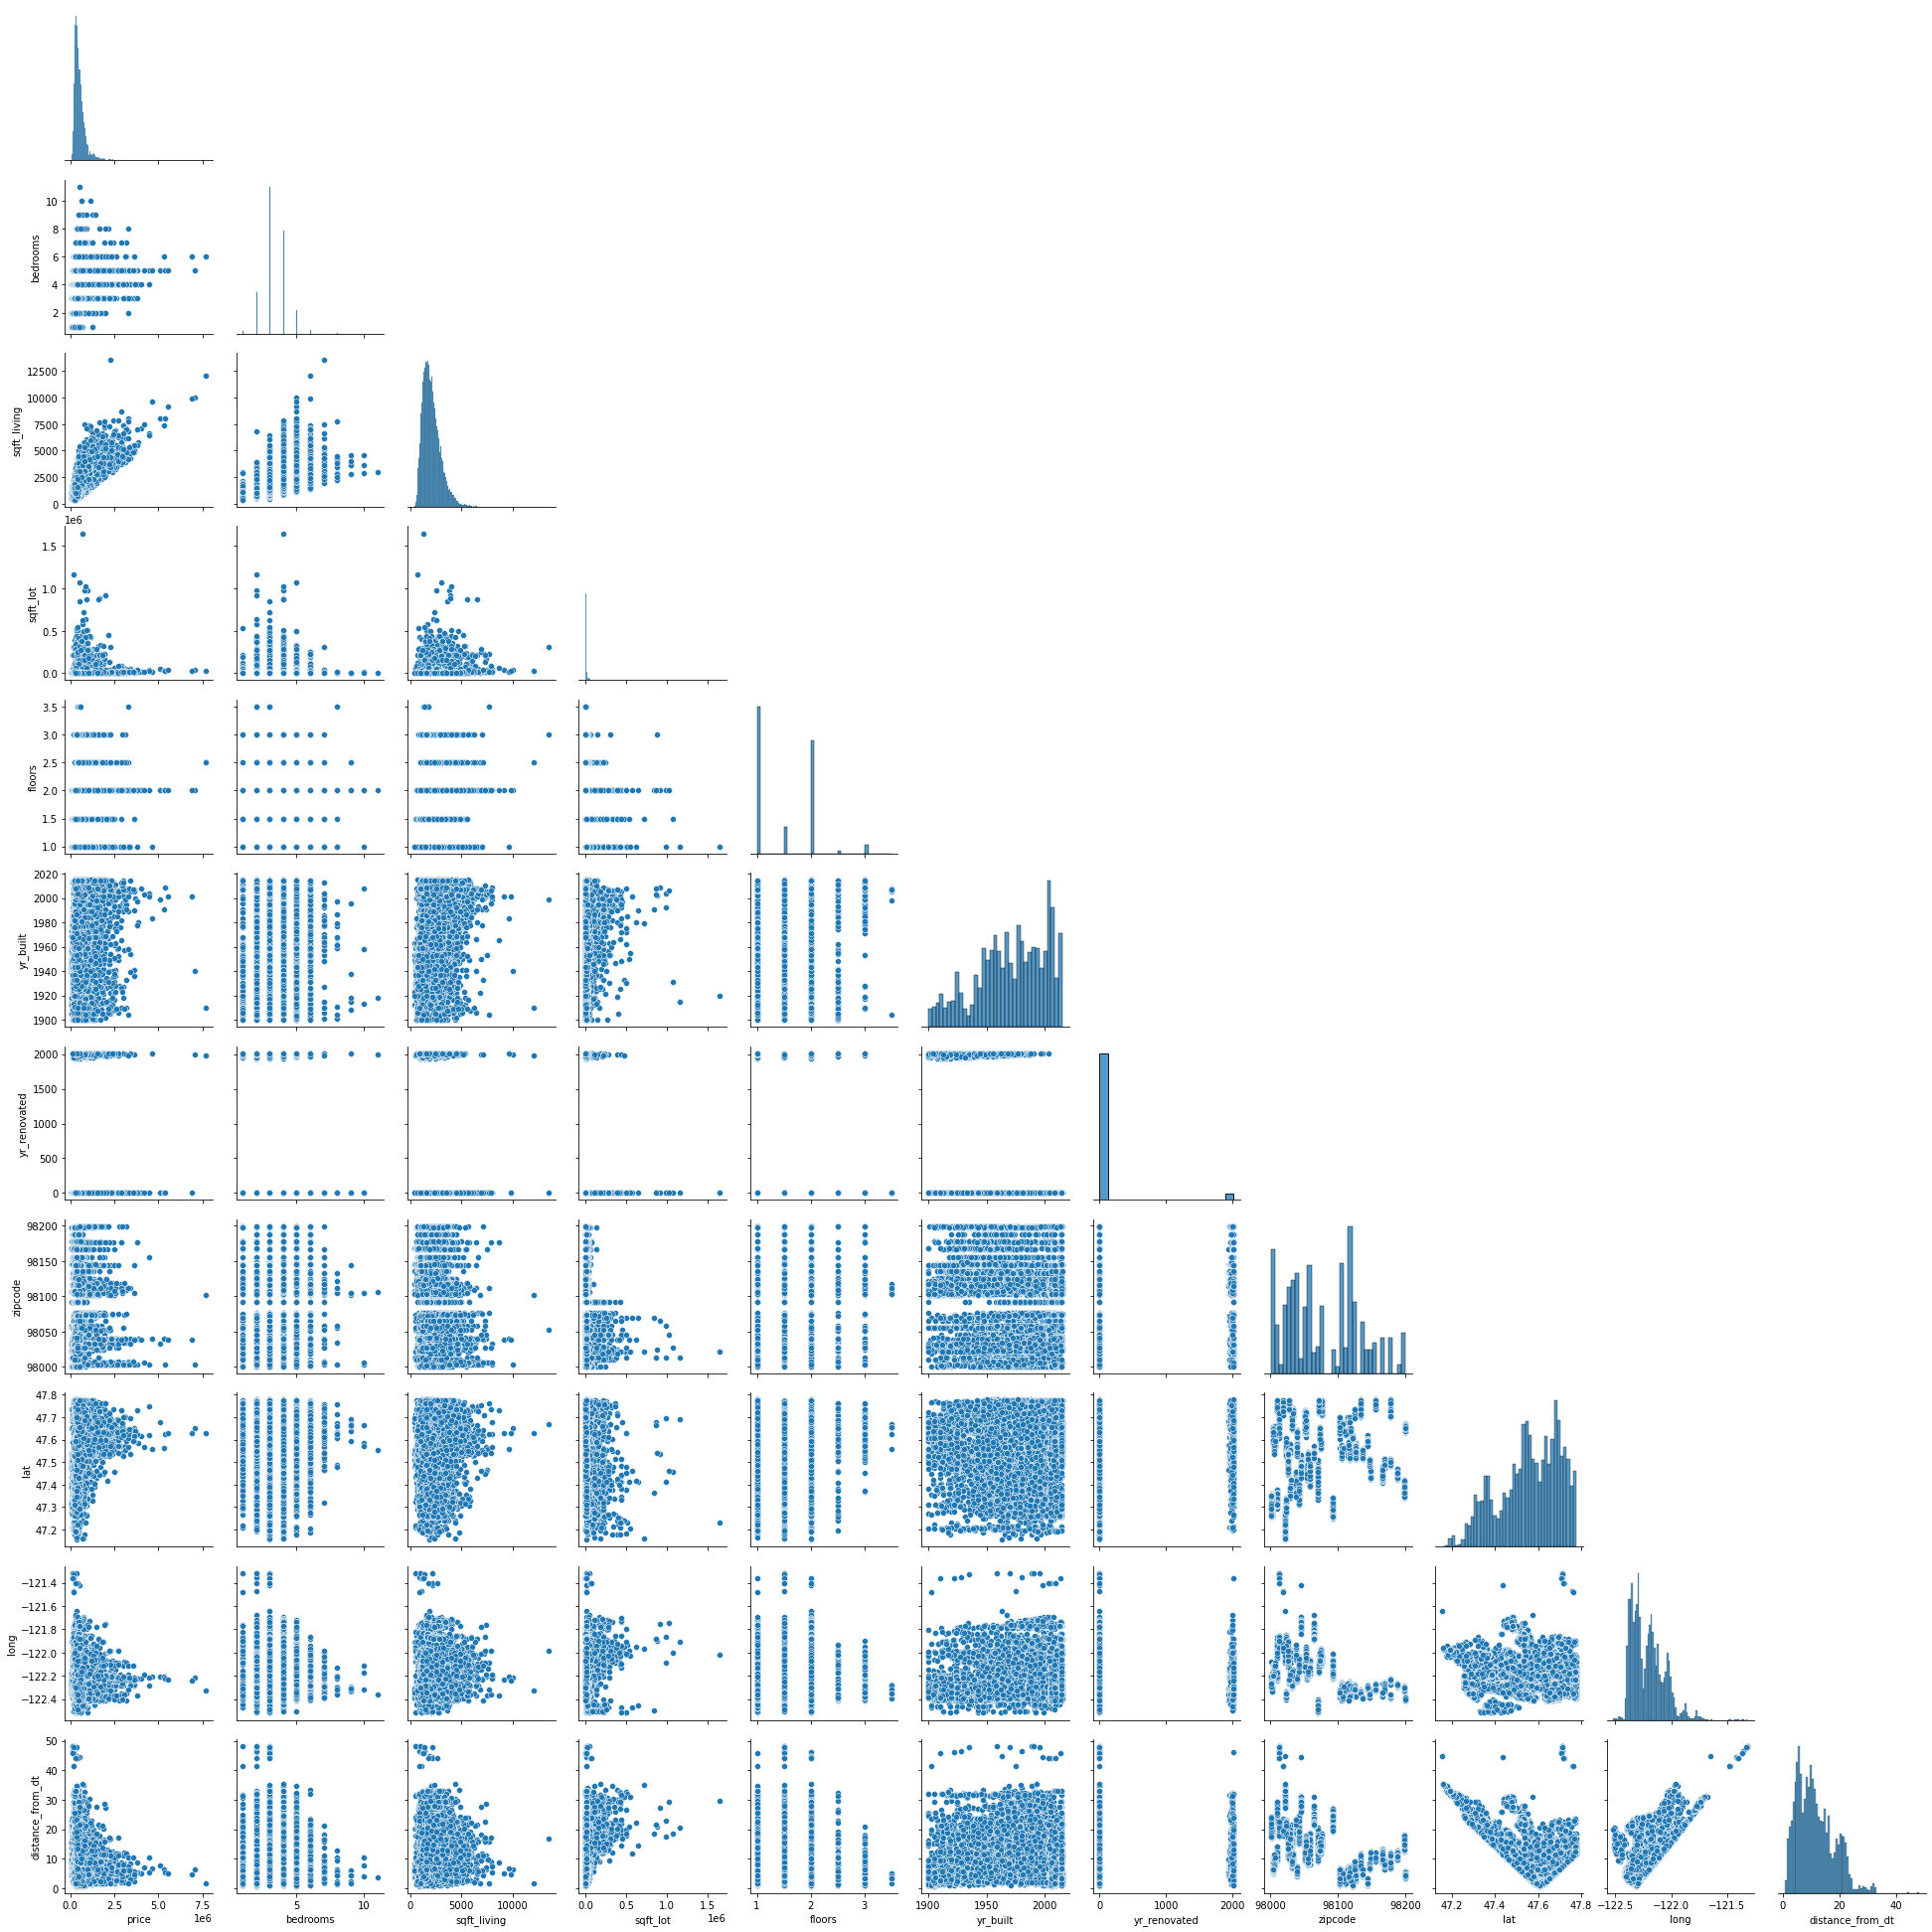

In [27]:
sns.pairplot(skinnydf, corner=True);

In [95]:
simple_formula = 'price ~ distance_from_dt'
simple_model = ols(simple_formula, skinnydf).fit()
simple_model_summary = simple_model.summary()

simple_model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.080
Model:                            OLS   Adj. R-squared:                  0.080
Method:                 Least Squares   F-statistic:                     1868.
Date:                Mon, 15 Nov 2021   Prob (F-statistic):               0.00
Time:                        17:25:00   Log-Likelihood:            -3.0650e+05
No. Observations:               21597   AIC:                         6.130e+05
Df Residuals:                   21595   BIC:                         6.130e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         7.208e+05   4817.010    149.643      0.000    7.11e+05     7.3e+05
distance_from_dt -1.568e+04    362.870    -43.215      0.000   -1.64e+04    -1.5e+04
==============================================================================
Omnibus:                    19440.132   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1298050.747
Skew:                           4.094   Prob(JB):                         0.00
Kurtosis:                      40.087   Cond. No.                         26.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

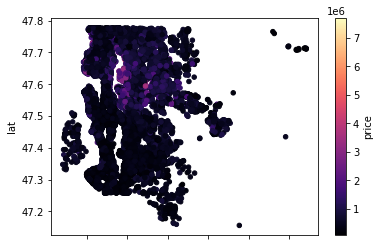

In [105]:
skinnydf.plot(x="long", y="lat", kind="scatter", c="price",
        colormap="magma");

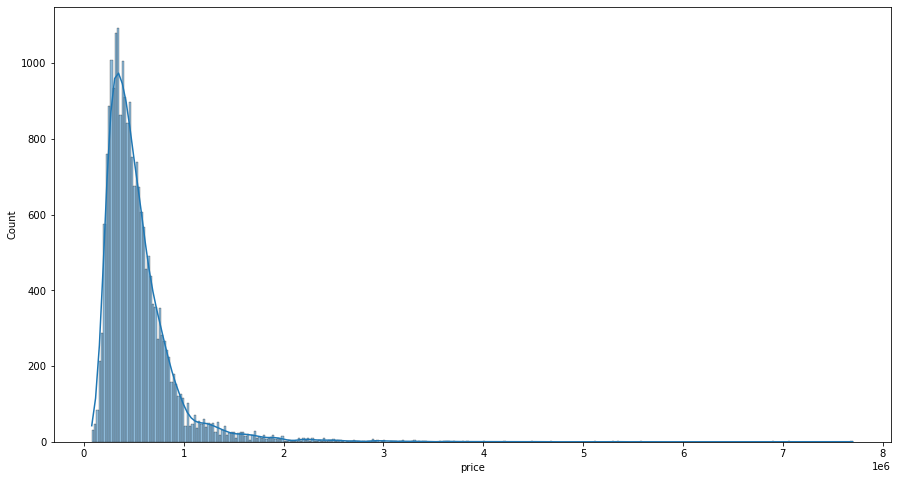

In [149]:
plt.figure(figsize = (15,8))
sns.histplot(skinnydf['price'], kde=True);

In [132]:
skinnydf['price'].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [181]:
normdf = skinnydf[skinnydf['price'] <= 645000] 

In [182]:
normdf

,date,price,bedrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,distance_from_dt
id,,,,,,,,,,,,,,,,,
7129300520,10/13/2014,221900.0,3,1180,5650,1.0,NaN,NONE,Average,7 Average,0.0,1955,0.0,98178,47.5112,-122.257,7.422544
6414100192,12/9/2014,538000.0,3,2570,7242,2.0,NO,NONE,Average,7 Average,400.0,1951,1991.0,98125,47.7210,-122.319,8.046186
5631500400,2/25/2015,180000.0,2,770,10000,1.0,NO,NONE,Average,6 Low Average,0.0,1933,NaN,98028,47.7379,-122.233,10.329114
2487200875,12/9/2014,604000.0,4,1960,5000,1.0,NO,NONE,Very Good,7 Average,910.0,1965,0.0,98136,47.5208,-122.393,6.430056
1954400510,2/18/2015,510000.0,3,1680,8080,1.0,NO,NONE,Average,8 Good,0.0,1987,0.0,98074,47.6168,-122.045,13.544634
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,5/21/2014,360000.0,3,1530,1131,3.0,NO,NONE,Average,8 Good,0.0,2009,0.0,98103,47.6993,-122.346,6.537299
6600060120,2/23/2015,400000.0,4,2310,5813,2.0,NO,NONE,Average,8 Good,0.0,2014,0.0,98146,47.5107,-122.362,6.641355
1523300141,6/23/2014,402101.0,2,1020,1350,2.0,NO,NONE,Average,7 Average,0.0,2009,0.0,98144,47.5944,-122.299,1.809009


In [183]:
normdf['price'].describe()

count     16226.000000
mean     392154.534821
std      126658.383711
min       78000.000000
25%      290000.000000
50%      385000.000000
75%      491837.500000
max      645000.000000
Name: price, dtype: float64

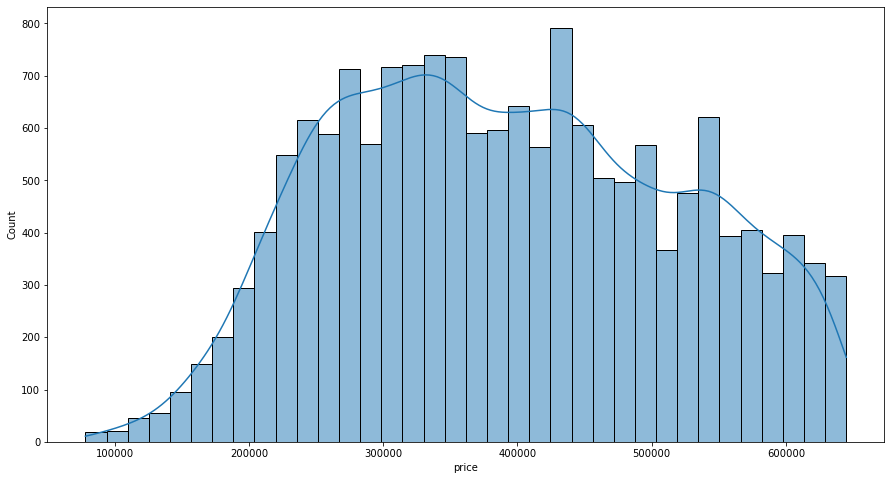

In [184]:
plt.figure(figsize = (15,8))
sns.histplot(normdf['price'], kde=True);

<AxesSubplot:xlabel='distance_from_dt', ylabel='Count'>

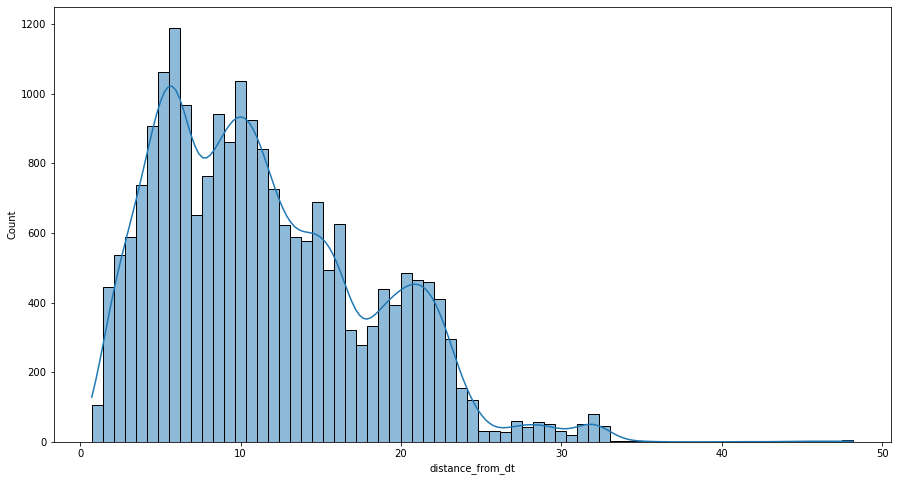

In [185]:
plt.figure(figsize = (15,8))
sns.histplot(skinnydf['distance_from_dt'], kde=True)

In [186]:
normdf = normdf[normdf['distance_from_dt'] <= 25]

In [187]:
normdf['distance_from_dt'].describe()

count    15718.000000
mean        11.806677
std          6.074416
min          0.719565
25%          6.633397
50%         10.859371
75%         16.335165
max         24.934921
Name: distance_from_dt, dtype: float64

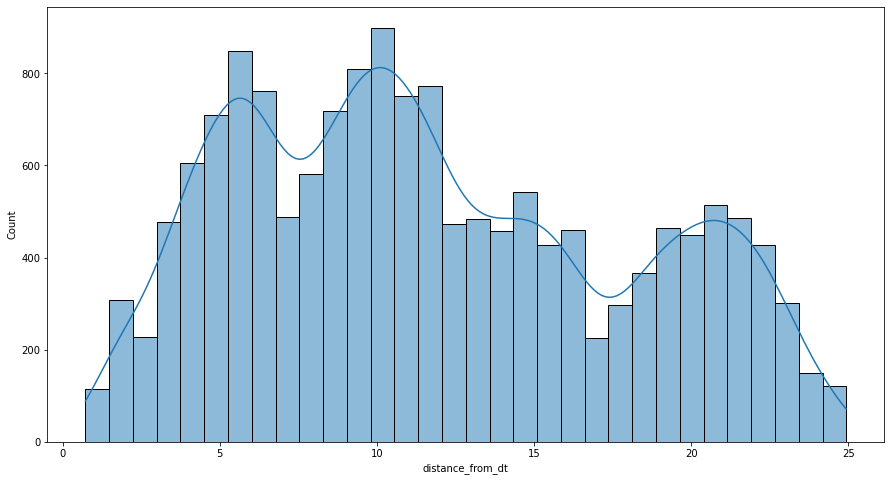

In [188]:
plt.figure(figsize = (15,8))
sns.histplot(normdf['distance_from_dt'], kde=True);

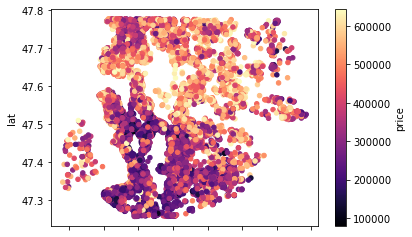

In [189]:
normdf.plot(x="long", y="lat", kind="scatter", c="price",
        colormap="magma");

In [190]:
normdf

,date,price,bedrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,distance_from_dt
id,,,,,,,,,,,,,,,,,
7129300520,10/13/2014,221900.0,3,1180,5650,1.0,NaN,NONE,Average,7 Average,0.0,1955,0.0,98178,47.5112,-122.257,7.422544
6414100192,12/9/2014,538000.0,3,2570,7242,2.0,NO,NONE,Average,7 Average,400.0,1951,1991.0,98125,47.7210,-122.319,8.046186
5631500400,2/25/2015,180000.0,2,770,10000,1.0,NO,NONE,Average,6 Low Average,0.0,1933,NaN,98028,47.7379,-122.233,10.329114
2487200875,12/9/2014,604000.0,4,1960,5000,1.0,NO,NONE,Very Good,7 Average,910.0,1965,0.0,98136,47.5208,-122.393,6.430056
1954400510,2/18/2015,510000.0,3,1680,8080,1.0,NO,NONE,Average,8 Good,0.0,1987,0.0,98074,47.6168,-122.045,13.544634
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,5/21/2014,360000.0,3,1530,1131,3.0,NO,NONE,Average,8 Good,0.0,2009,0.0,98103,47.6993,-122.346,6.537299
6600060120,2/23/2015,400000.0,4,2310,5813,2.0,NO,NONE,Average,8 Good,0.0,2014,0.0,98146,47.5107,-122.362,6.641355
1523300141,6/23/2014,402101.0,2,1020,1350,2.0,NO,NONE,Average,7 Average,0.0,2009,0.0,98144,47.5944,-122.299,1.809009


In [191]:
normcorr = normdf.corr()
mask = np.zeros_like(normcorr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
normcorr[mask] = np.nan
(normcorr
 .style
 .background_gradient(cmap='RdBu', axis=None, vmin=-1, vmax=1)
 .highlight_null(null_color='#f1f1f1')  # Color NaNs grey
 .set_precision(2))

,price,bedrooms,sqft_living,sqft_lot,floors,yr_built,yr_renovated,zipcode,lat,long,distance_from_dt
price,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
bedrooms,0.20,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
sqft_living,0.44,0.62,nan,nan,nan,nan,nan,nan,nan,nan,nan
sqft_lot,0.07,0.03,0.13,nan,nan,nan,nan,nan,nan,nan,nan
floors,0.21,0.11,0.27,-0.06,nan,nan,nan,nan,nan,nan,nan
yr_built,0.07,0.18,0.36,-0.00,0.56,nan,nan,nan,nan,nan,nan
yr_renovated,0.04,-0.01,0.00,0.02,-0.02,-0.19,nan,nan,nan,nan,nan
zipcode,0.00,-0.17,-0.23,-0.12,-0.07,-0.33,0.06,nan,nan,nan,nan
lat,0.49,-0.11,-0.13,-0.06,-0.01,-0.19,0.02,0.29,nan,nan,nan
long,0.10,0.17,0.28,0.20,0.12,0.39,-0.05,-0.55,-0.09,nan,nan


In [192]:
normdf.describe()

,price,bedrooms,sqft_living,sqft_lot,floors,yr_built,yr_renovated,zipcode,lat,long,distance_from_dt
count,15718.000000,15718.000000,15718.000000,1.571800e+04,15718.000000,15718.000000,12909.000000,15718.000000,15718.000000,15718.000000,15718.000000
mean,393922.440260,3.224838,1775.053569,1.189378e+04,1.422636,1970.201743,56.812999,98080.876066,47.546594,-122.228660,11.806677
std,126772.973028,0.860781,632.045796,2.827326e+04,0.535940,28.249866,331.684112,54.266013,0.144724,0.127651,6.074416
min,78000.000000,1.000000,370.000000,5.720000e+02,1.000000,1900.000000,0.000000,98001.000000,47.257400,-122.519000,0.719565
25%,292500.000000,3.000000,1310.000000,5.000000e+03,1.000000,1951.000000,0.000000,98033.000000,47.432600,-122.334000,6.633397
50%,388000.000000,3.000000,1700.000000,7.350000e+03,1.000000,1971.000000,0.000000,98070.000000,47.546000,-122.264000,10.859371
75%,495000.000000,4.000000,2160.000000,9.774000e+03,2.000000,1994.000000,0.000000,98122.000000,47.683200,-122.149000,16.335165
max,645000.000000,11.000000,5461.000000,1.164794e+06,3.500000,2015.000000,2015.000000,98199.000000,47.777600,-121.815000,24.934921


In [200]:
skinny_formula = 'price ~ distance_from_dt'
skinny_model = ols(skinny_formula, skinnydf).fit()
skinny_model_summary = skinny_model.summary()

skinny_model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.080
Model:                            OLS   Adj. R-squared:                  0.080
Method:                 Least Squares   F-statistic:                     1868.
Date:                Mon, 15 Nov 2021   Prob (F-statistic):               0.00
Time:                        19:47:03   Log-Likelihood:            -3.0650e+05
No. Observations:               21597   AIC:                         6.130e+05
Df Residuals:                   21595   BIC:                         6.130e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         7.208e+05   4817.010    149.643      0.000    7.11e+05     7.3e+05
distance_from_dt -1.568e+04    362.870    -43.215      0.000   -1.64e+04    -1.5e+04
==============================================================================
Omnibus:                    19440.132   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1298050.747
Skew:                           4.094   Prob(JB):                         0.00
Kurtosis:                      40.087   Cond. No.                         26.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [197]:
simple_formula = 'price ~ distance_from_dt'
simple_model = ols(simple_formula, normdf).fit()
simple_model_summary = simple_model.summary()

simple_model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.087
Model:                            OLS   Adj. R-squared:                  0.086
Method:                 Least Squares   F-statistic:                     1488.
Date:                Mon, 15 Nov 2021   Prob (F-statistic):          3.74e-311
Time:                        19:46:27   Log-Likelihood:            -2.0628e+05
No. Observations:               15718   AIC:                         4.126e+05
Df Residuals:                   15716   BIC:                         4.126e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         4.664e+05   2112.629    220.765      0.000    4.62e+05    4.71e+05
distance_from_dt -6138.1457    159.113    -38.577      0.000   -6450.025   -5826.267
==============================================================================
Omnibus:                      635.226   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              294.142
Skew:                           0.107   Prob(JB):                     1.34e-64
Kurtosis:                       2.365   Cond. No.                         29.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [201]:
skinnysqft_formula = 'price ~ sqft_living'
skinnysqft_model = ols(skinnysqft_formula, skinnydf).fit()
skinnysqft_model_summary = skinnysqft_model.summary()

skinnysqft_model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Mon, 15 Nov 2021   Prob (F-statistic):               0.00
Time:                        19:48:17   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.399e+04   4410.023     -9.975      0.000   -5.26e+04   -3.53e+04
sqft_living   280.8630      1.939    144.819      0.000     277.062     284.664
==============================================================================
Omnibus:                    14801.942   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           542662.604
Skew:                           2.820   Prob(JB):                         0.00
Kurtosis:                      26.901   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [202]:
simple_formula = 'price ~ sqft_living'
simple_model = ols(simple_formula, normdf).fit()
simple_model_summary = simple_model.summary()

simple_model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.190
Method:                 Least Squares   F-statistic:                     3698.
Date:                Mon, 15 Nov 2021   Prob (F-statistic):               0.00
Time:                        19:48:35   Log-Likelihood:            -2.0533e+05
No. Observations:               15718   AIC:                         4.107e+05
Df Residuals:                   15716   BIC:                         4.107e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    2.385e+05   2712.413     87.945      0.000    2.33e+05    2.44e+05
sqft_living    87.5357      1.440     60.808      0.000      84.714      90.357
==============================================================================
Omnibus:                     1767.583   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              596.758
Skew:                           0.223   Prob(JB):                    2.60e-130
Kurtosis:                       2.156   Cond. No.                     5.62e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.62e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [203]:
skinnymulti_formula = 'price ~ sqft_living + distance_from_dt'
skinnymulti_model = ols(skinnymulti_formula, skinnydf).fit()
skinnymulti_model_summary = skinnymulti_model.summary()

skinnymulti_model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                 1.665e+04
Date:                Mon, 15 Nov 2021   Prob (F-statistic):               0.00
Time:                        19:49:50   Log-Likelihood:            -2.9732e+05
No. Observations:               21597   AIC:                         5.946e+05
Df Residuals:                   21594   BIC:                         5.947e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         1.508e+05   4599.319     32.786      0.000    1.42e+05     1.6e+05
sqft_living        291.3428      1.713    170.068      0.000     287.985     294.701
distance_from_dt -1.881e+04    237.965    -79.058      0.000   -1.93e+04   -1.83e+04
==============================================================================
Omnibus:                    16408.831   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           907919.323
Skew:                           3.156   Prob(JB):                         0.00
Kurtosis:                      34.130   Cond. No.                     6.67e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.67e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [204]:
normmulti_formula = 'price ~ sqft_living + distance_from_dt'
normmulti_model = ols(normmulti_formula, normdf).fit()
normmulti_model_summary = normmulti_model.summary()

normmulti_model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.390
Model:                            OLS   Adj. R-squared:                  0.390
Method:                 Least Squares   F-statistic:                     5032.
Date:                Mon, 15 Nov 2021   Prob (F-statistic):               0.00
Time:                        19:50:16   Log-Likelihood:            -2.0310e+05
No. Observations:               15718   AIC:                         4.062e+05
Df Residuals:                   15715   BIC:                         4.062e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         3.036e+05   2522.237    120.368      0.000    2.99e+05    3.09e+05
sqft_living        116.0086      1.311     88.510      0.000     113.440     118.578
distance_from_dt -9790.6979    136.377    -71.791      0.000   -1.01e+04   -9523.383
==============================================================================
Omnibus:                      103.204   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               81.247
Skew:                           0.095   Prob(JB):                     2.28e-18
Kurtosis:                       2.704   Cond. No.                     6.02e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.02e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""